In [2]:
import numpy as np
import seaborn as sns
import os
import nibabel as nib
import pgmpy
import matplotlib.pyplot as plt
%matplotlib notebook
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# 1) Importation du dataset

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


<OrthoSlicer3D: /Users/chalvidalm/Documents/3A OMA/Projets OMA/Projet/guest-20181031_072008/100_Guys/T1/NIfTI/IXI100-Guys-0747-T1.nii.gz (150, 256, 256)>

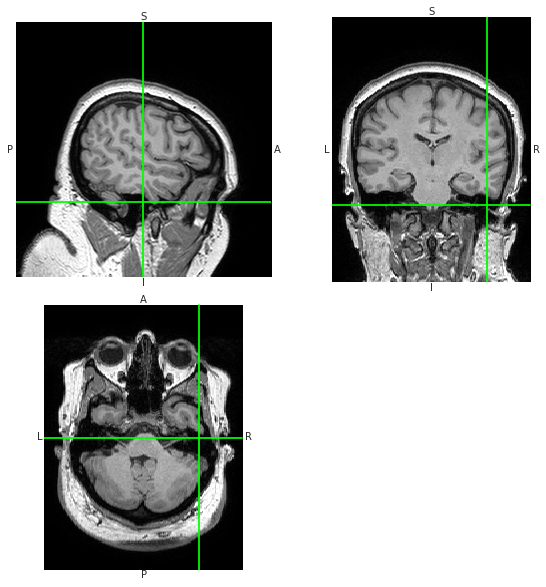

In [3]:
epi_img = nib.load('/Users/chalvidalm/Documents/3A OMA/Projets OMA/Projet/guest-20181031_072008/100_Guys/T1/NIfTI/IXI100-Guys-0747-T1.nii.gz')
epi_img.orthoview()

resolution of image in millimeters per voxel : (0.93749994, 0.93749964, 1.1999978)


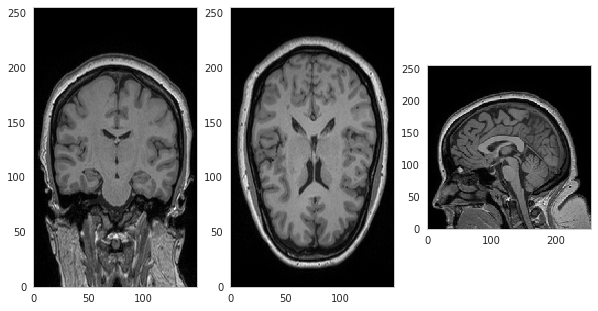

In [4]:
print("resolution of image in millimeters per voxel :", epi_img.header.get_zooms())

epi_img_data = epi_img.get_fdata()

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices), figsize=(10,6))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        
slice_0 = epi_img_data[125, :, :].T
slice_1 = epi_img_data[:, 130, :].T
slice_2 = epi_img_data[:, :, 75]
show_slices([slice_0,slice_1,slice_2])

In [5]:
data = epi_img_data[:, 130, :]
print(data.shape)
data_sagit = epi_img_data[:, :, 75]
print(data_sagit.shape)

(256, 150)
(256, 256)


Text(0.5, 1.0, 'Original Image')

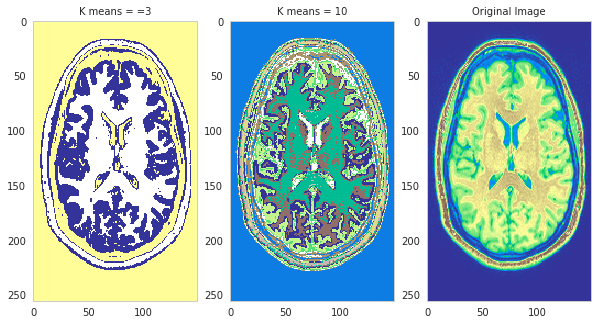

In [17]:
map_kmeans = KMeans(n_clusters=3, max_iter=200).fit_predict(data.reshape(-1, 1))

#Int = kmeans.cluster_centers_[kmeans.predict(data)]
#Int = Int.reshape(data.shape)
#map_kmeans=kmeans.predict(data.flatten()).reshape(256,150)

map_kmeans_2 = KMeans(n_clusters=10, max_iter=200).fit_predict(data.reshape(-1, 1))

#Int_2 = kmeans.cluster_centers_[kmeans.predict(data)]
#Int_2 = Int_2.reshape(data.shape)
#map_kmeans_2=kmeans.predict(data.flatten()).reshape(256,150)

fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].imshow(map_kmeans.reshape(256, 150), cmap='terrain')
ax[0].set_title('K means = =3', size=10)
ax[1].imshow(map_kmeans_2.reshape(256, 150), cmap='terrain')
ax[1].set_title('K means = 10', size=10)
ax[2].imshow(data, cmap='terrain')
ax[2].set_title('Original Image', size=10)

In [16]:
map_kmeans.shape

(38400,)

In [8]:
data.shape

(256, 150)

## Estimateur a noyaux pour l'estimation de région

In [13]:
intensity_vec = data.flatten().astype(float)
intensity_vec = intensity_vec[:,np.newaxis]
print(intensity_vec.max())

intensity_vec_sagit = data_sagit.flatten().astype(float)
intensity_vec_sagit = intensity_vec_sagit[:,np.newaxis]

#intensity_vec = intensity_vec[intensity_vec > 0 ]
#log_intensity = np.log(intensity_vec)

2168.2210326194763


(0, 0.004)

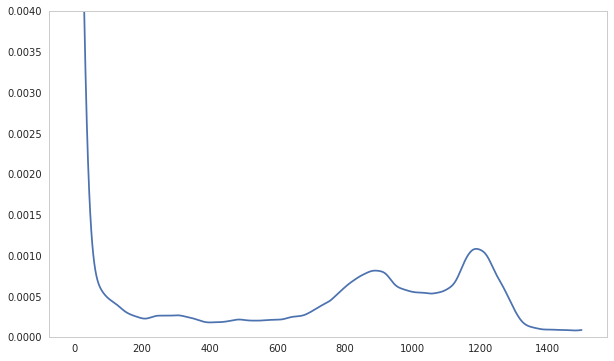

In [14]:
from sklearn.neighbors.kde import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=15).fit(intensity_vec)

#print(kde.get_params())

density = kde.score_samples(np.linspace(0, 1500, 3000)[:,np.newaxis])
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.linspace(0, 1500, 3000),np.exp(density))
ax.set_ylim([0,0.004])

Text(0.5, 1.0, 'Matière grise')

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


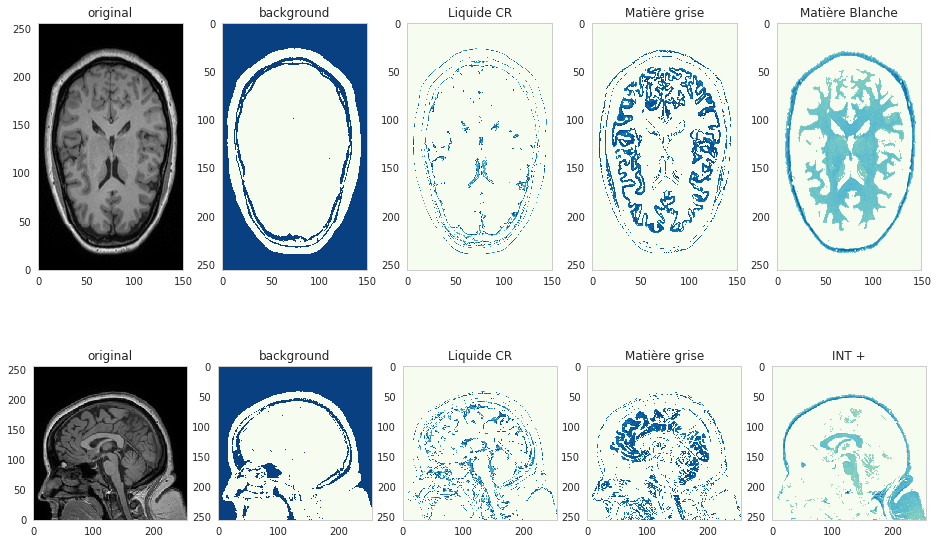

In [15]:
mask = np.where((intensity_vec <200), 1, -1)[::-1]
mask_2 = np.where((intensity_vec >300)&(intensity_vec <500), intensity_vec, -1)[::-1]
mask_3 = np.where((intensity_vec >1000), intensity_vec, -1)[::-1]
mask_4 = np.where((intensity_vec >800)&(intensity_vec <1000), intensity_vec, -1)[::-1]

mask_sagit = np.where((intensity_vec_sagit <200), 1, -1)[::-1]
mask_2_sagit = np.where((intensity_vec_sagit >300)&(intensity_vec_sagit <500), intensity_vec_sagit, -1)[::-1]
mask_3_sagit = np.where((intensity_vec_sagit >1000), intensity_vec_sagit, -1)[::-1]
mask_4_sagit = np.where((intensity_vec_sagit >800)&(intensity_vec_sagit <1000), intensity_vec_sagit, -1)[::-1]

fig, ax = plt.subplots(2, 5, figsize=(16,10))
ax[0,0].imshow(slice_1.T, cmap="gray", origin="lower")
ax[0,0].set_title('original')
ax[0,1].imshow(mask.reshape(256,150), cmap='GnBu')
ax[0,1].set_title('background')
ax[0,2].imshow(np.fliplr(mask_2.reshape(256,150)), cmap='GnBu')
ax[0,2].set_title('Liquide CR')
ax[0,4].imshow(np.fliplr(mask_3.reshape(256,150)), cmap='GnBu')
ax[0,4].set_title('Matière Blanche')
ax[0,3].imshow(np.fliplr(mask_4.reshape(256,150)), cmap='GnBu')
ax[0,3].set_title('Matière grise')

ax[1,0].imshow(slice_2.T, cmap="gray", origin="lower")
ax[1,0].set_title('original')
ax[1,1].imshow(np.rot90(mask_sagit.reshape(256,256),3), cmap='GnBu')
ax[1,1].set_title('background')
ax[1,2].imshow(np.rot90(mask_2_sagit.reshape(256,256),3), cmap='GnBu')
ax[1,2].set_title('Liquide CR')
ax[1,4].imshow(np.rot90(mask_3_sagit.reshape(256,256),3), cmap='GnBu')
ax[1,4].set_title('INT +')
ax[1,3].imshow(np.rot90(mask_4_sagit.reshape(256,256),3), cmap='GnBu')
ax[1,3].set_title('Matière grise')

**A faire** : Découpage automatique de la densité de probabilité, assignation automatique des régions, Propagation de l'information entre slice, Recoupage sur T2

## Gaussian Mixture Model

In [17]:
i = np.where(intensity_vec > 100)
GMM = GaussianMixture(3,init_params='kmeans')
GMM.fit(intensity_vec[i].reshape(-1, 1))
Labels = GMM.predict(intensity_vec[i].reshape(-1, 1))
Labels_back = np.ones(intensity_vec.shape)*3
Labels_back[i] = Labels

In [18]:
print(np.unique(Labels_back), np.unique(Labels))

[0. 1. 2. 3.] [0 1 2]


In [19]:
Probs = GMM.predict_proba(intensity_vec[i].reshape(-1, 1))

(array([4237.,  757., 1773., 2508., 2077., 1405., 1420., 1817., 2937.,
        3850.]),
 array([1.12183321e-05, 7.02231328e-02, 1.40435047e-01, 2.10646962e-01,
        2.80858876e-01, 3.51070791e-01, 4.21282705e-01, 4.91494620e-01,
        5.61706534e-01, 6.31918448e-01, 7.02130363e-01]),
 <a list of 10 Patch objects>)

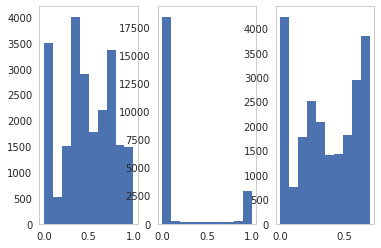

In [20]:
fig, a = plt.subplots(1,3)
a[0].hist(Probs.T[0])
a[1].hist(Probs.T[1])
a[2].hist(Probs.T[2]) 

In [21]:
Probs.shape

(22781, 3)

Text(0.5, 1.0, 'GMM')

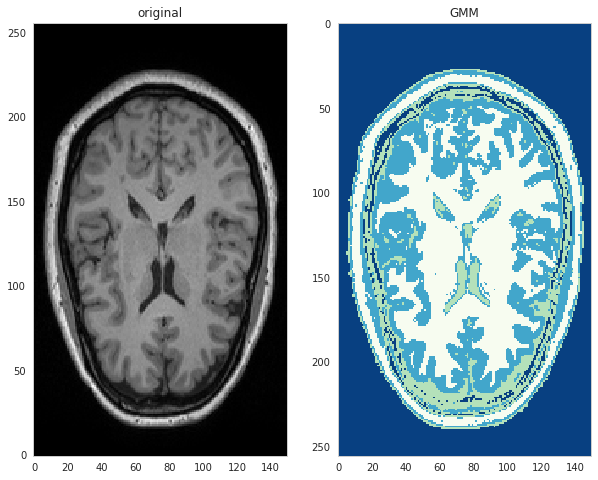

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10,8))
ax[0].imshow(slice_1.T, cmap="gray", origin="lower")
ax[0].set_title('original')
ax[1].imshow(np.flip(Labels_back.reshape(slice_1.T.shape), axis=0) ,cmap='GnBu')
ax[1].set_title('GMM')

In [23]:
import numpy as np
print(np.__path__)
print(np.version.version)

['//anaconda/lib/python3.5/site-packages/numpy']
1.15.2


In [24]:
middelbury mrf library; trvs de kolmogorov vladimir;

SyntaxError: invalid syntax (<ipython-input-24-9291b6938f17>, line 1)

## Formulation sous forme de model graphique (Maximisation de MAP par EM)

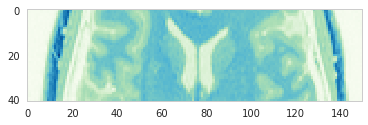

In [25]:
plt.figure()
plt.imshow(slice_1[:,80:121].T, cmap='GnBu')

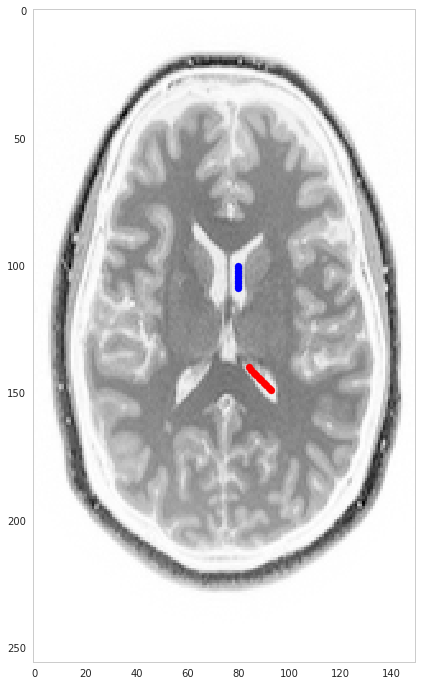

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(slice_1.T/np.max(slice_1.T))
plt.scatter([80 for i in range(10)],[100+i for i in range(10)], c='b')
plt.scatter([84+i for i in range(10)],[140+i for i in range(10)], c='R')

In [27]:
Probs = GMM.predict_proba(slice_1.T[80,100:110].reshape(-1, 1))

In [28]:
img = slice_1.T[50:200,50:100]/np.max(slice_1.T[50:200,50:100])

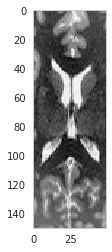

In [29]:
fig, a = plt.subplots(1)
a.imshow(img)

In [30]:
kde_back = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(img[10:40,20].reshape(-1, 1))
density_back = kde_back.score_samples(img.reshape(-1, 1))
fore = kde_back.score_samples(np.linspace(0, 1, 100)[:,np.newaxis])
kde_fore = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(img[45:60,22].reshape(-1, 1))
density_fore = kde_fore.score_samples(img.reshape(-1, 1))
back = kde_fore.score_samples(np.linspace(0, 1, 100)[:,np.newaxis])

In [31]:

fig, a = plt.subplots(1,3, figsize=())
a[0].plot(np.linspace(0, 1, 100),np.exp(fore), c='b')
a[0].plot(np.linspace(0, 1, 100),np.exp(back), c='r')
a[1].imshow(density_back.reshape(img.shape))
a[1].scatter(np.ones(15)*22 , np.arange(45,60),c='b')
a[2].imshow(density_fore.reshape(img.shape))
a[2].scatter(np.arange(10,40),np.ones(30)*20,c='r')

TypeError: from_bounds() missing 2 required positional arguments: 'width' and 'height'

In [32]:
back_ = np.exp(density_back) / (np.exp(density_back) + np.exp(density_fore))
fore_ = np.exp(density_fore) / (np.exp(density_fore) + np.exp(density_back))

In [33]:
from scipy.misc import imread
import maxflow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

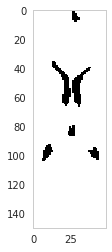

In [34]:
g = maxflow.Graph[float]()
nodeids = g.add_grid_nodes(img.shape)
g.add_grid_edges(nodeids, 0.4)
g.add_grid_tedges(nodeids, fore_.reshape(img.shape), back_.reshape(img.shape))
g.maxflow()
sgm = g.get_grid_segments(nodeids)
img2 = np.int_(np.logical_not(sgm))
fig, a = plt.subplots(1,1)
a.imshow(img2)
img2

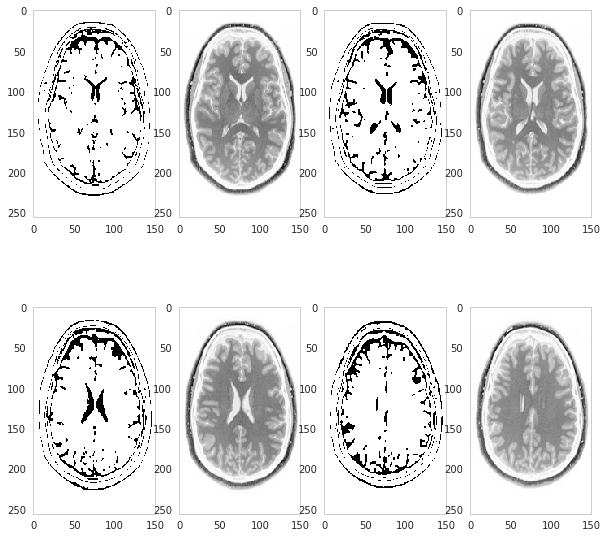

In [35]:
fig, a = plt.subplots(2,4, figsize=(10,10))
for i in range(0,8,2):
    img_2 = epi_img_data[:, 125+i*3, :]/np.max(epi_img_data[:, 125+i*3, :])
    kde_back_2 = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(img_2[:,20].reshape(-1, 1))
    density_back_2 = kde_back_2.score_samples(img_2.reshape(-1, 1))
    kde_fore_2 = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(img[45:60,22].reshape(-1, 1))
    density_fore_2 = kde_fore_2.score_samples(img_2.reshape(-1, 1))
    back_2 = np.exp(density_back_2) / (np.exp(density_back_2) + np.exp(density_fore_2))
    fore_2 = np.exp(density_fore_2) / (np.exp(density_fore_2) + np.exp(density_back_2))

    g_2 = maxflow.Graph[float]()
    nodeids_2 = g_2.add_grid_nodes(img_2.shape)
    g_2.add_grid_edges(nodeids_2, 0.2)
    g_2.add_grid_tedges(nodeids_2, fore_2.reshape(img_2.shape), back_2.reshape(img_2.shape))
    g_2.maxflow()
    sgm_2 = g_2.get_grid_segments(nodeids_2)
    img__2 = np.int_(np.logical_not(sgm_2))
    a[i//4,i%4].imshow(img__2)
    a[i//4,(i%4)+1].imshow(img_2)

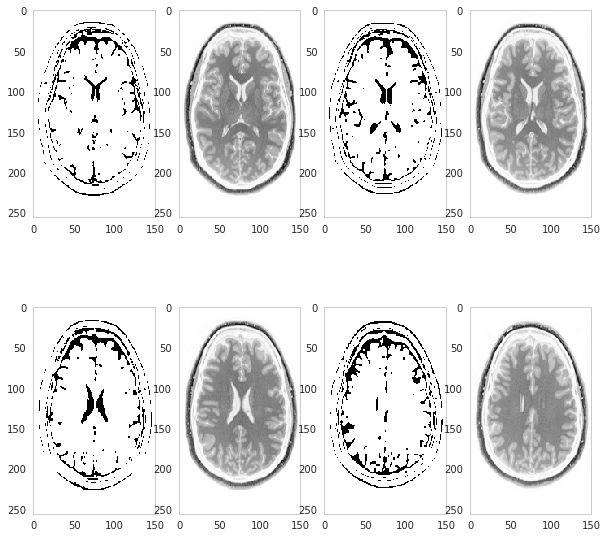

In [36]:
fig, a = plt.subplots(2,4, figsize=(10,10))
for i in range(0,8,2):
    img_2 = epi_img_data[:, 125+i*3, :]/np.max(epi_img_data[:, 125+i*3, :])
    training = np.concatenate((img_2[:,50].reshape(-1, 1), img_2[40,:].reshape(-1, 1)), axis=0)
    kde_back_2 = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(training)
    density_back_2 = kde_back_2.score_samples(img_2.reshape(-1, 1))
    kde_fore_2 = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(img[45:60,22].reshape(-1, 1))
    density_fore_2 = kde_fore_2.score_samples(img_2.reshape(-1, 1))
    back_2 = np.exp(density_back_2) / (np.exp(density_back_2) + np.exp(density_fore_2))
    fore_2 = np.exp(density_fore_2) / (np.exp(density_fore_2) + np.exp(density_back_2))

    g_2 = maxflow.Graph[float]()
    nodeids_2 = g_2.add_grid_nodes(img_2.shape)
    g_2.add_grid_edges(nodeids_2, 0.2)
    g_2.add_grid_tedges(nodeids_2, fore_2.reshape(img_2.shape), back_2.reshape(img_2.shape))
    g_2.maxflow()
    sgm_2 = g_2.get_grid_segments(nodeids_2)
    img__2 = np.int_(np.logical_not(sgm_2))
    a[i//4,i%4].imshow(img__2)
    a[i//4,(i%4)+1].imshow(img_2)

In [37]:
struct = np.zeros((80,50,70), dtype=bool)
for i in range(50):
    if i%10 == 0:
        print('{} ème strate'.format(i))
    img_2 = epi_img_data[80:160, 110+i, 40:110]/np.max(epi_img_data[80:160, 110+i, 40:110])
    kde_back_2 = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(img_2[:,60].reshape(-1, 1))
    density_back_2 = kde_back_2.score_samples(img_2.reshape(-1, 1))
    kde_fore_2 = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(img[45:60,22].reshape(-1, 1))
    density_fore_2 = kde_fore_2.score_samples(img_2.reshape(-1, 1))
    back_2 = np.exp(density_back_2) / (np.exp(density_back_2) + np.exp(density_fore_2))
    fore_2 = np.exp(density_fore_2) / (np.exp(density_fore_2) + np.exp(density_back_2))
    g_2 = maxflow.Graph[float]()
    nodeids_2 = g_2.add_grid_nodes(img_2.shape)
    g_2.add_grid_edges(nodeids_2, 0.2)
    g_2.add_grid_tedges(nodeids_2, fore_2.reshape(img_2.shape), back_2.reshape(img_2.shape))
    g_2.maxflow()
    sgm_2 = g_2.get_grid_segments(nodeids_2)
    struct[:,i,:] = np.int_(np.logical_not(sgm_2))
    

0 ème strate
10 ème strate
20 ème strate
30 ème strate
40 ème strate


In [38]:
indices = np.nonzero(struct)
indices

(array([ 0,  0,  0, ..., 79, 79, 79]),
 array([ 0,  8,  9, ..., 47, 49, 49]),
 array([ 0, 36, 35, ..., 64,  8, 35]))

In [39]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
ind = np.array(indices)
DBS=  DBSCAN(eps=4, min_samples=110)
labs = DBS.fit_predict(ind.T)
np.unique(labs)

array([-1,  0,  1,  2,  3,  4])

(-50, 100)

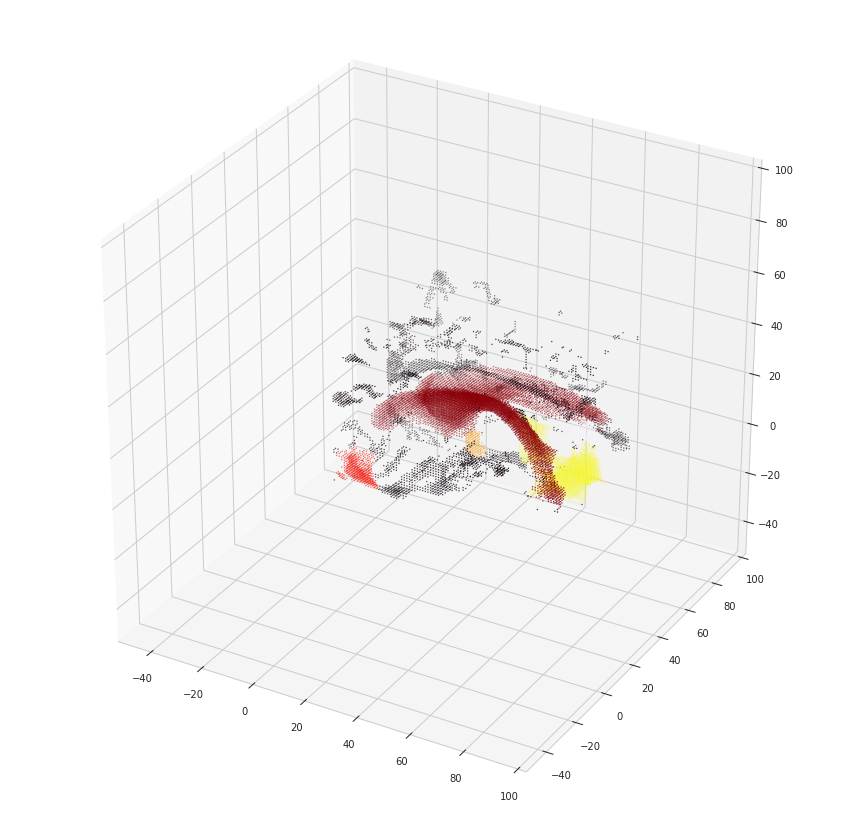

In [42]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#D_mask = np.where((data <200), data, 0)
ax.scatter(indices[0], indices[2], indices[1], s=2, c=labs, label=labs, cmap='hot',linewidths=0.01, edgecolors='b')
ax.set_xlim([-50,100])
ax.set_ylim([-50,100])
ax.set_zlim([-50,100])

#ax2 = fig.add_subplot(122, projection='3d')
#ax2.plot_trisurf(indices[0], indices[2], indices[1])

In [43]:
ind_vent = ind.T[np.where((labs==0))]
ind_vent.shape

(8418, 3)

(-50, 100)

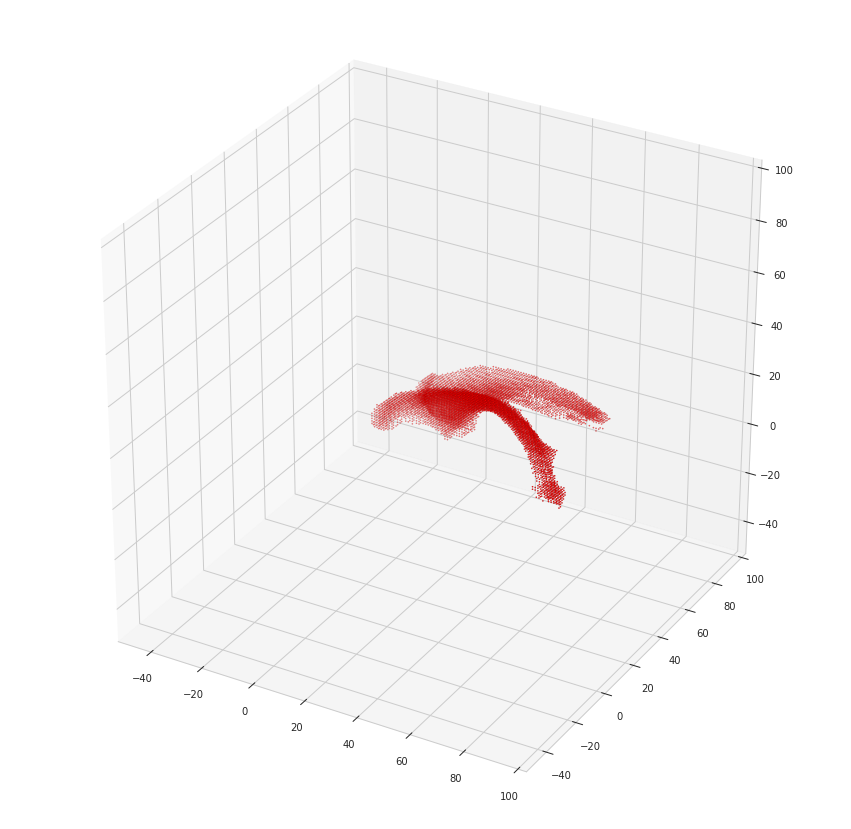

In [46]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#D_mask = np.where((data <200), data, 0)
ax.scatter(ind_vent.T[0], ind_vent.T[2], ind_vent.T[1],s=2, c = 'r',linewidths=0.1, edgecolors='black')
ax.set_xlim([-50,100])
ax.set_ylim([-50,100])
ax.set_zlim([-50,100])

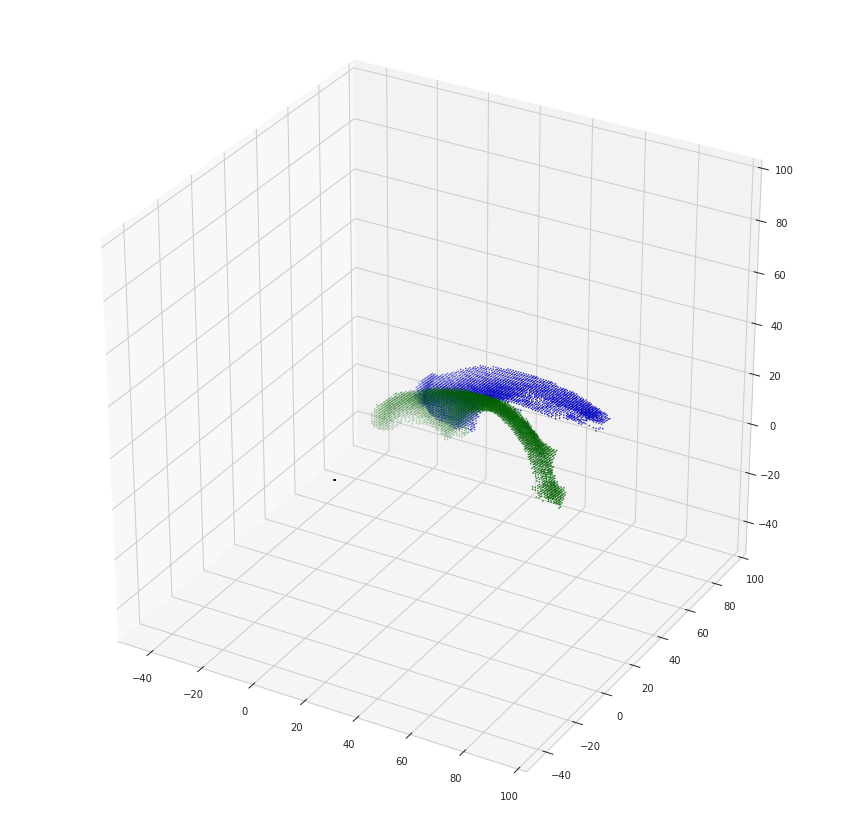

In [48]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
mask = np.where((ind_vent.T[2] <37) & (ind_vent.T[2] >10 ),ind_vent.T,0)
ax.scatter(mask[0], mask[2], mask[1],s=2, c = 'g',linewidths=0.1, edgecolors='black')
ax.set_xlim([-50,100])
ax.set_ylim([-50,100])
ax.set_zlim([-50,100])
mask = np.where((ind_vent.T[2] >36),ind_vent.T,0)
ax.scatter(mask[0], mask[2], mask[1],s=2, c = 'b',linewidths=0.1, edgecolors='black')


In [85]:
import scipy
Hull = scipy.spatial.ConvexHull(mask.T)
Delaunay = scipy.spatial.Delaunay(mask.T)

In [885]:
mask.shape

(3, 8418)

In [88]:
Delaunay.simplices

array([[8379, 8352, 2544,   23],
       [ 280, 1426, 2355,   23],
       [ 280,   62, 1045,    0],
       ...,
       [6034, 6020, 6035, 6123],
       [6034, 6020, 6122, 6123],
       [6034, 6019, 6020, 6122]], dtype=int32)

<IPython.core.display.Javascript object>


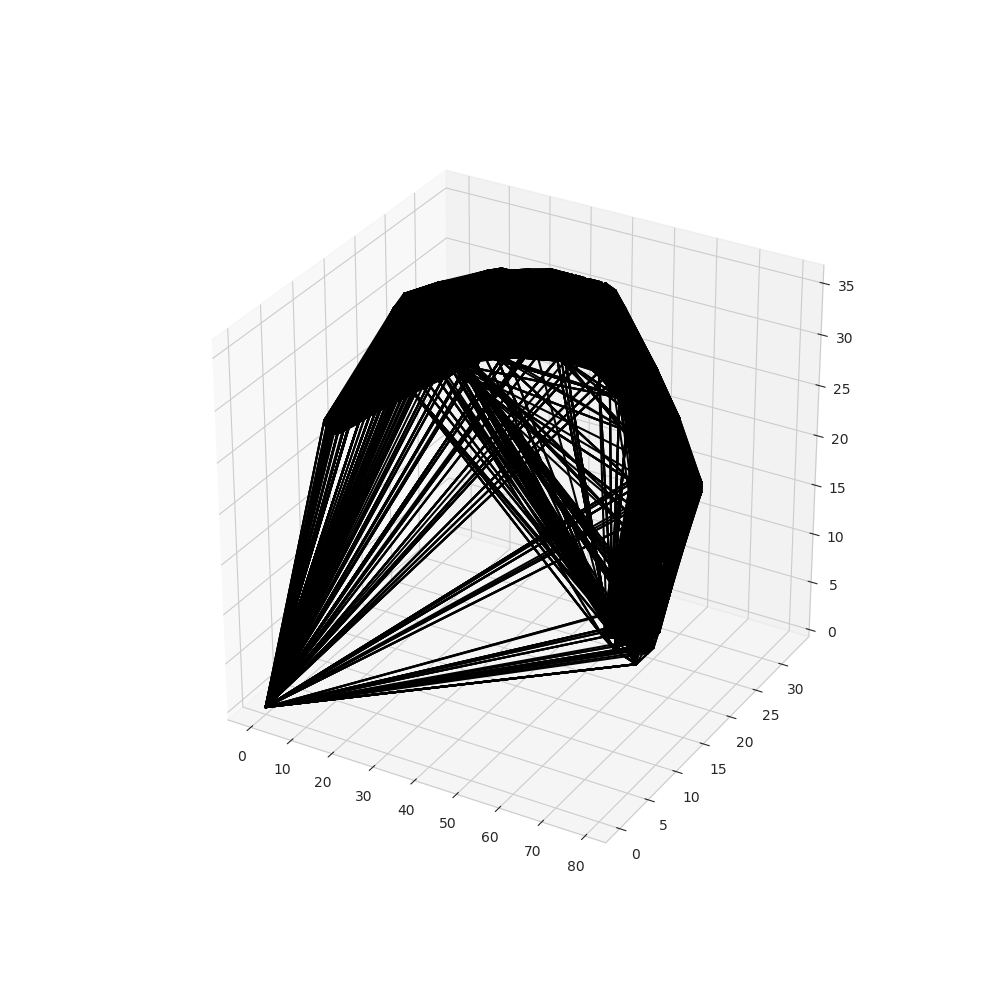

In [89]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for simplex in Delaunay.simplices:
    ax.plot(mask.T[simplex, 0], mask.T[simplex, 1], mask.T[simplex, 2], 'k-')


In [1]:
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

verts, faces, normals, values = measure.marching_cubes_lewiner(epi_img_data, 200)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)


NameError: name 'epi_img_data' is not defined

<IPython.core.display.Javascript object>


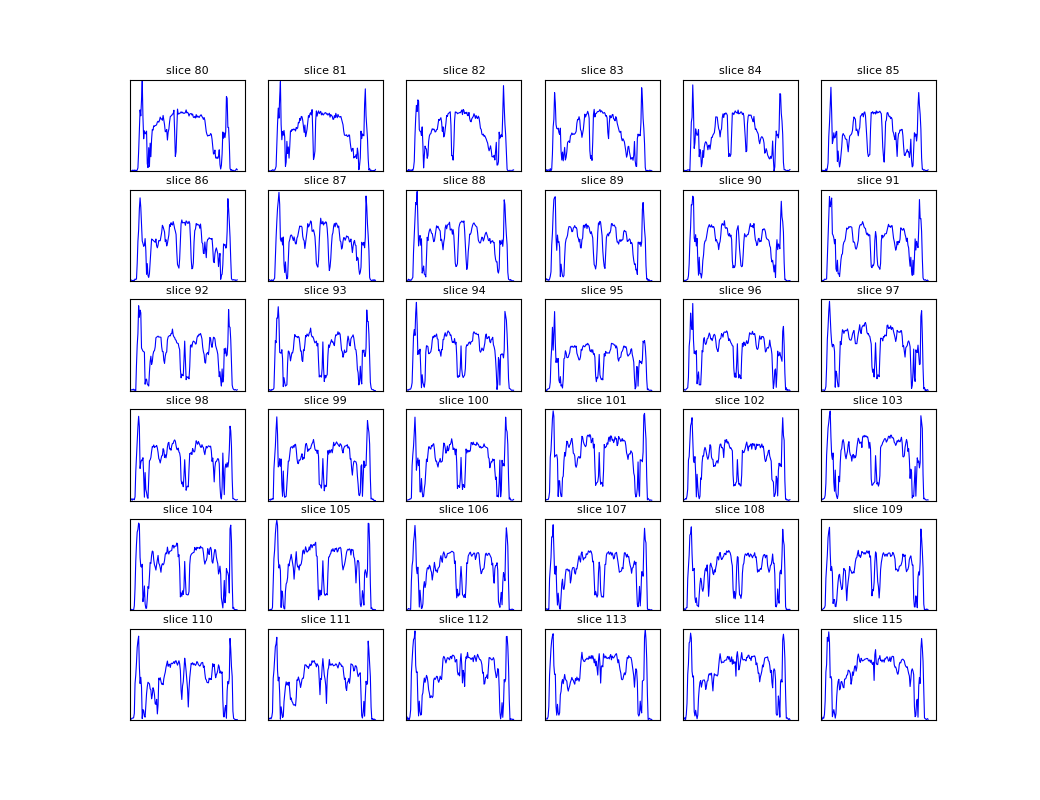

In [96]:
fig, ax = plt.subplots(6, 6, figsize=(13, 10))
for i in range(36):
    ax[i//6,i%6].plot(slice_1[:,85+i])
    ax[i//6,i%6].set_title('slice {}'.format(80+i),size=10)
    ax[i//6,i%6].set_xticks([])
    ax[i//6,i%6].set_yticks([])

In [1]:
from mpl_toolkits.mplot3d import Axes3D
grad = np.array(np.gradient(slice_1.T))
grad = grad / np.max(grad)
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')
#D_mask = np.where((data <200), data, 0)
ax.plot_trisurf(np.tile(np.arange(150),256),np.tile(np.arange(256),150),grad.flatten(),cmap=cm.coolwarm)
#ax.contour(np.tile(np.arange(150),256), np.tile(np.arange(256),150), grad[0].T, zdir='z', offset=-5, cmap=cm.coolwarm)
ax.set_zlim([-5,5])

NameError: name 'np' is not defined

In [71]:
np.array(np.gradient(slice_1.T))

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [82]:
grad[0].T.shape

(150, 256)

In [143]:
D_mask = np.where((data <200), data, 'nan')
D_mask.shape 

(256, 150)

In [108]:
from pgmpy.models import BayesianModel
from pgmpy.models import MarkovModel
Markov_field = MarkovModel()

## Atlases

<IPython.core.display.Javascript object>


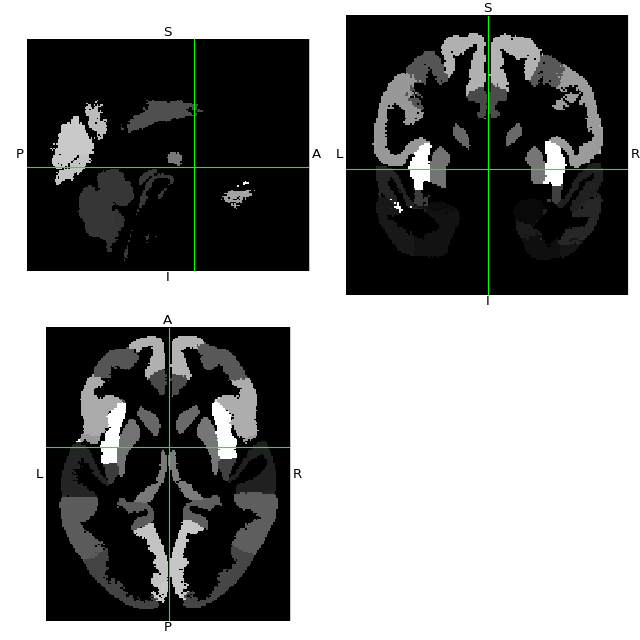

In [10]:
atlases = nib.load('/Users/chalvidalm/Documents/3A OMA/Projets OMA/Projet/Hammers_mith-n30r95-maxprob-MNI152-SPM12/Hammers_mith-n30r95-MaxProbMap-gm-MNI152-SPM12.nii.gz')
atlases.orthoview()
at= atlases.get_fdata()

In [92]:
print(atlases.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 157 189 156   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 18
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 78.0
qoffset_y       : -112.0
qoffset_z       : -70.0
srow_x          : [ 0.  0.  0.  0.]
srow_

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#D_mask = np.where((data <200), data, 0)
slice_1.T
ax.scatter(ind_vent.T[0], ind_vent.T[2], ind_vent.T[1],s=2, c = 'r',linewidths=0.1, edgecolors='black')
ax.set_xlim([-50,100])
ax.set_ylim([-50,100])
ax.set_zlim([-50,100])